In [18]:
import sys
sys.path.append(r"/home/graham/Documents/Ironhack/Final-Project")
import src
import matplotlib.pyplot as plt


In [3]:
path = '/home/graham/Documents/Ironhack/Final-Project/data/Global Dataset of Inflation.csv'
inflation_df = src.read_csv_file(path)


In [4]:
# src.msno.matrix(inflation_df)

In [5]:
null_counts = inflation_df.loc[:, '1990':'2022'].isnull().sum()

print(null_counts)


1990    294
1991    276
1992    264
1993    247
1994    231
1995    224
1996    213
1997    208
1998    199
1999    192
2000    187
2001    173
2002    158
2003    154
2004    149
2005    137
2006    122
2007    112
2008    103
2009     97
2010     90
2011     96
2012     87
2013     68
2014     49
2015     48
2016     37
2017     46
2018     46
2019     55
2020     64
2021     77
2022    118
dtype: int64


In [6]:
inflation_df = inflation_df.drop(inflation_df.loc[:,'1970':'2007'].columns, axis=1)



In [7]:
drop_columns = inflation_df.filter(regex='Unnamed').columns
inflation_df = inflation_df.drop(drop_columns, axis=1)

In [8]:
for column in inflation_df.columns:
    null_count = inflation_df[column].isnull().sum()
    print(f"{column}: {null_count}")

Country Code: 0
IMF Country Code: 2
Country: 0
Indicator Type: 0
Series Name: 0
2008: 103
2009: 97
2010: 90
2011: 96
2012: 87
2013: 68
2014: 49
2015: 48
2016: 37
2017: 46
2018: 46
2019: 55
2020: 64
2021: 77
2022: 118
Note: 0


In [9]:
inflation_df.dropna()

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Note
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,8.96,-2.14,2.08,4.32,0.63,...,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,12.47,13.72,14.48,13.48,10.28,...,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,3.41,2.29,3.57,3.41,2.03,...,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,12.27,1.57,0.88,0.88,0.66,...,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation
5,ARG,213.0,Argentina,Inflation,Headline Consumer Price Inflation,8.59,6.27,10.46,9.77,10.04,...,38.08,26.54,39.40,25.68,34.28,53.55,42.02,48.41,72.43,Annual average inflation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,TUR,186.0,Turkey,Inflation,Producer Price Inflation,12.72,1.23,8.52,11.09,6.09,...,10.25,5.28,4.30,15.82,27.01,17.56,12.14,43.86,130.85,"Producer Price Index, All Commodities"
774,UKR,926.0,Ukraine,Inflation,Producer Price Inflation,35.56,6.59,20.88,19.00,3.65,...,17.17,35.69,20.92,26.45,17.58,4.14,-1.88,40.82,61.05,"Producer Price Index, All Commodities"
775,URY,298.0,Uruguay,Inflation,Producer Price Inflation,16.94,2.11,7.61,15.93,6.43,...,10.41,6.83,3.35,1.67,9.67,12.78,10.46,14.42,14.19,"Producer Price Index, All Commodities"
776,USA,111.0,United States,Inflation,Producer Price Inflation,9.81,-8.84,4.48,3.87,1.86,...,1.58,-0.87,0.42,2.33,2.90,1.69,-2.12,8.95,7.91,"Producer Price Index, All Commodities"


In [10]:
df_filtered = inflation_df[inflation_df.apply(lambda row: "Headline Consumer Price Inflation" in row.values, axis=1)]


In [11]:
df_filtered = df_filtered.dropna()

In [12]:
df_filtered['mean_inflation'] = df_filtered.loc[:, '2008':'2022'].mean(axis=1)


In [13]:
sorted_df = df_filtered.sort_values('mean_inflation', ascending=False)


In [14]:
print("Top 10 countries with highest mean inflation:")
print(sorted_df[['Country', 'mean_inflation']].head(10))


Top 10 countries with highest mean inflation:
                Country  mean_inflation
185       Venezuela, RB     6032.932667
151               Sudan     1195.502667
192            Zimbabwe       91.891333
98              Lebanon       30.258000
5             Argentina       29.076000
81   Iran, Islamic Rep.       24.292000
189         Yemen, Rep.       20.696667
161            Suriname       20.546667
56             Ethiopia       18.178667
20              Belarus       17.087333


In [15]:
print("Top 10 countries with lowest mean inflation:")
print(sorted_df[['Country', 'mean_inflation']].tail(10))

Top 10 countries with lowest mean inflation:
                 Country  mean_inflation
59                France        1.447333
142          Puerto Rico        1.428000
47              Dominica        1.403333
70               Grenada        1.382667
43                Cyprus        1.250000
94   St. Kitts and Nevis        1.104667
80               Ireland        0.985333
25     Brunei Darussalam        0.644667
88                 Japan        0.463333
31           Switzerland        0.324000


In [16]:
top_10 = sorted_df.head(10)
bottom_10 = sorted_df.tail(10)

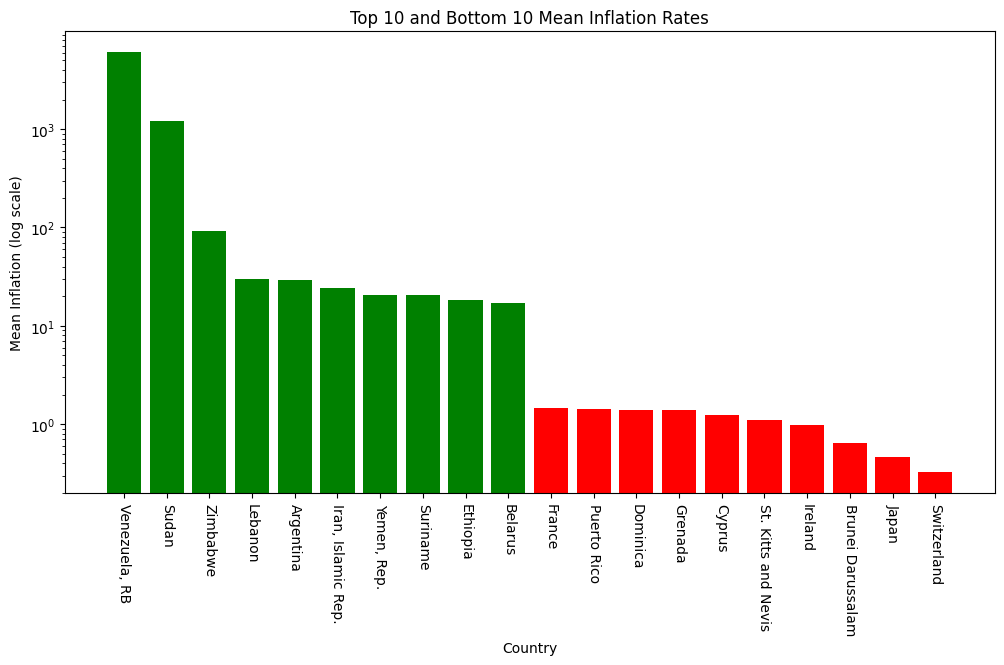

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(sorted_df.head(10)['Country'], sorted_df.head(10)['mean_inflation'], color='green')
ax.bar(sorted_df.tail(10)['Country'], sorted_df.tail(10)['mean_inflation'], color='red')
ax.set_yscale('log')

ax.set_xlabel('Country')
ax.set_ylabel('Mean Inflation (log scale)')
ax.set_title('Top 10 and Bottom 10 Mean Inflation Rates')
plt.xticks(rotation=270)

plt.show()


In [ ]:
import plotly.graph_objs as go

data = go.Choropleth(
    locations=sorted_df['Country Code'],
    z=sorted_df['mean_inflation'],
    text=sorted_df['Country'],
    colorscale='Viridis',
    zmin=-5, # set the minimum value of the scale
    zmax=20, # set the maximum value of the scale
    colorbar=dict(
        title='Mean Inflation',
        tickvals=[-5, 0, 5, 10, 15, 20], # set the tick values of the color bar
        ticktext=['< -5', '0', '5', '10', '15', '> 20'] # set the tick text of the color bar
    )
)

layout = go.Layout(
    title='Mean Annual Inflation by Country 2008-2022(%)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [21]:
sorted_df.to_csv('/home/graham/Documents/Ironhack/Final-Project/data/inflation_df.csv')